In [22]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [23]:
root_dir = Path('/home/keiichi.kuroyanagi/lost+found/datasets/bdd100k/bdd100k')
images_dir = 'images/100k/train'
path = root_dir / images_dir
images_list = sorted([p.name for p in path.iterdir() if p.is_file()])

In [24]:
root_dir = Path('/home/keiichi.kuroyanagi/lost+found/datasets/bdd100k/bdd100k')
masks_dir = 'labels/drivable/masks/train'
path = root_dir / masks_dir
masks_list = sorted([p.name for p in path.iterdir() if p.is_file()])

In [25]:
images_list[0]

'0000f77c-6257be58.jpg'

In [26]:
masks_list[0]

'0000f77c-6257be58.png'

In [27]:
index = 0

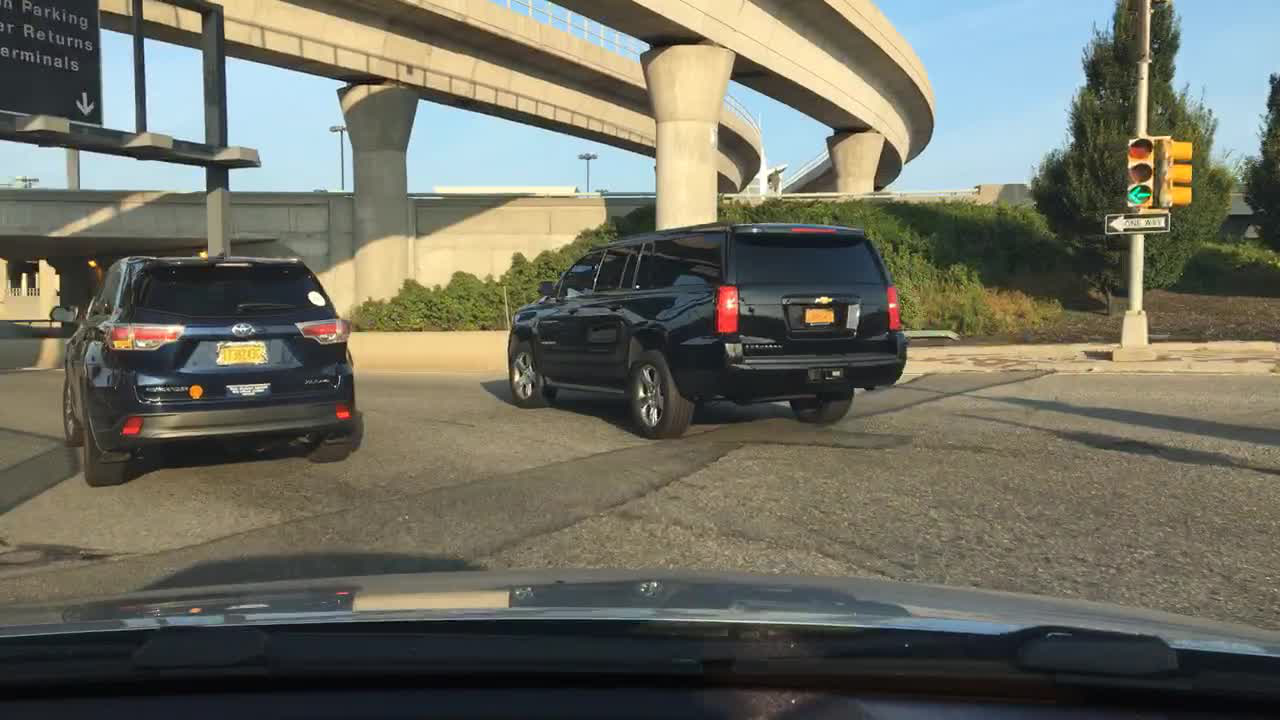

In [28]:
input_image = Image.open(str(root_dir / images_dir / images_list[index]))
input_image

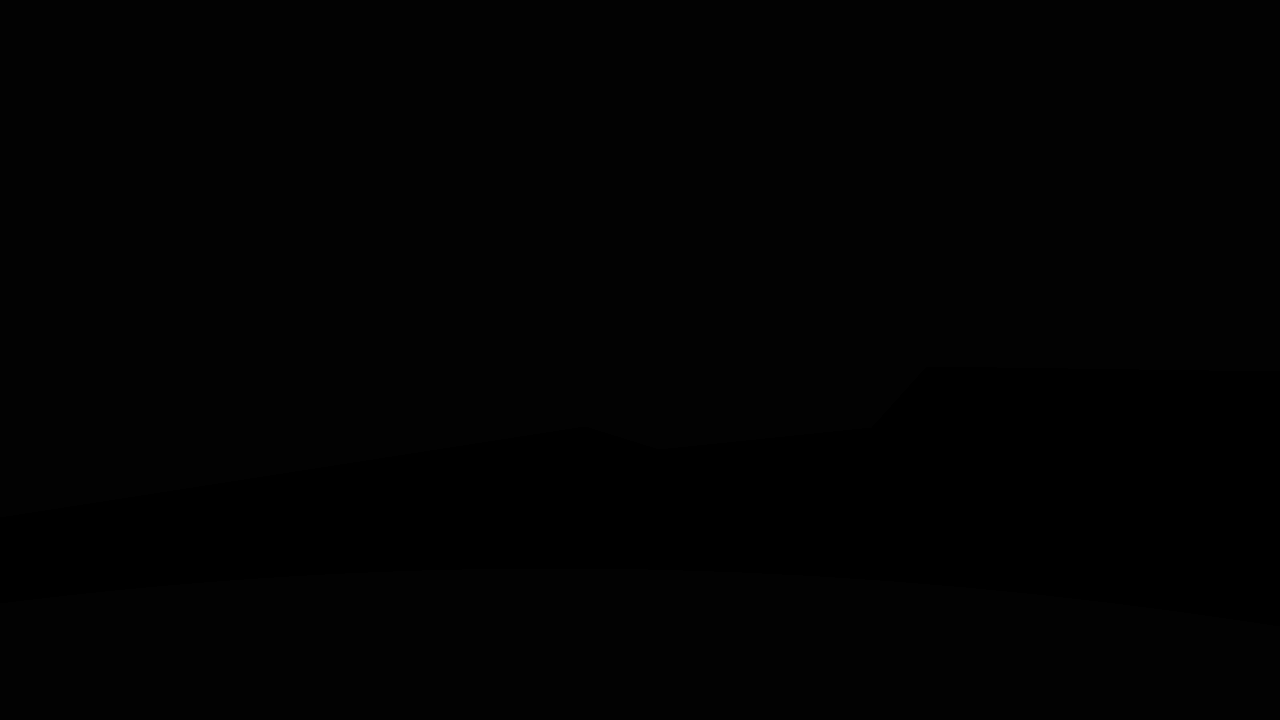

In [29]:
mask_image = Image.open(str(root_dir / masks_dir / masks_list[index]))
mask_image

In [30]:
unique, counts = np.unique(mask_image, return_counts=True)
dict(zip(unique, counts))

{0: 194466, 2: 727134}

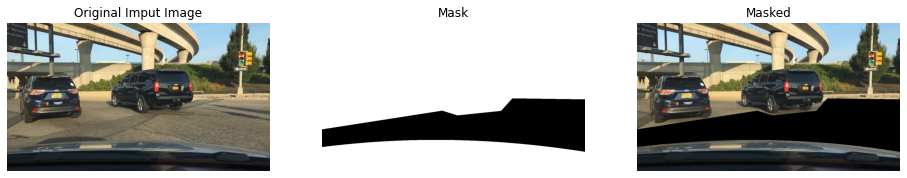

In [31]:
# select only masked area below
masked = np.array(input_image).copy()
masked[np.array(mask_image) == 0] = 0

fig, axes = plt.subplots(1, 3, figsize=(16, 12))
ax = axes.flatten()

ax[0].imshow(input_image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Imput Image", fontsize=12)

ax[1].imshow(mask_image, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Mask", fontsize=12)

ax[2].imshow(masked, cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Masked", fontsize=12)

plt.show()